#Importing Libraries and Dataset <br><br>
Here we are using <br><br>

[Pandas](https://www.geeksforgeeks.org/python-pandas-dataframe/) – To load the Dataframe <br><br>
[Matplotlib](https://www.geeksforgeeks.org/matplotlib-tutorial/) – To visualize the data features i.e. barplot <br><br>
[Seaborn](https://www.geeksforgeeks.org/introduction-to-seaborn-python/) – To see the correlation between features using heatmap



In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [31]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/House Price Prediction-Python/kc_house_data.csv")

In [32]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Như chúng tôi đã nhập dữ liệu. Vì vậy, phương thức hình dạng sẽ cho chúng ta thấy kích thước của tập dữ liệu. 

In [33]:
data.shape


(21613, 21)

#Data Preprocessing (Tiền xử lý dữ liệu) <br>
Bây giờ, chúng tôi phân loại các tính năng tùy thuộc vào kiểu dữ liệu của chúng (int, float, object) và sau đó tính số lượng của chúng. 

In [34]:
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))

int_ = (data.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

fl = (data.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))


Categorical variables: 1
Integer variables: 15
Float variables: 5


#Exploratory Data Analysis


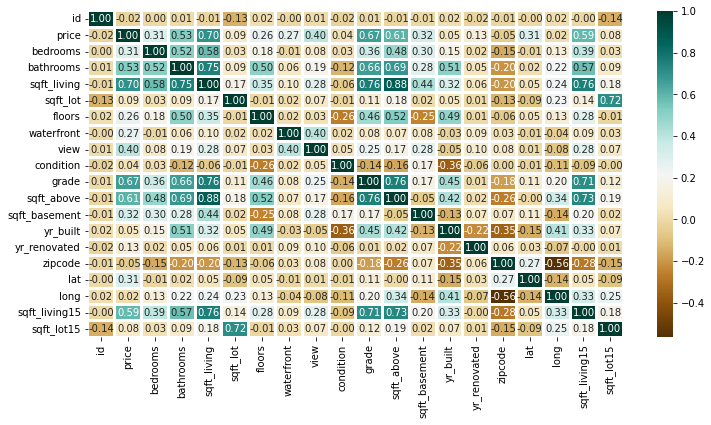

In [35]:
plt.figure(figsize=(12, 6))
sns.heatmap(data.corr(),
			cmap = 'BrBG',
			fmt = '.2f',
			linewidths = 2,
			annot = True)


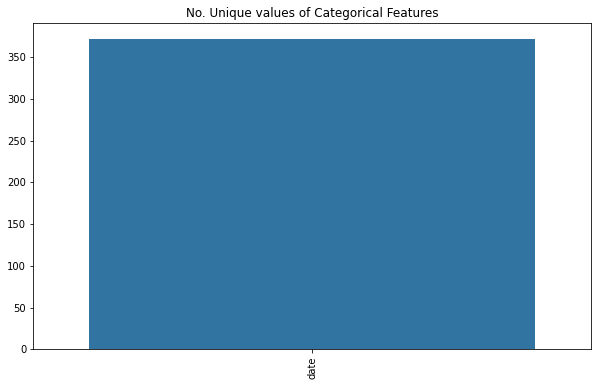

In [36]:
unique_values = []
for col in object_cols:
    unique_values.append(data[col].unique().size)
plt.figure(figsize=(10,6))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_values)


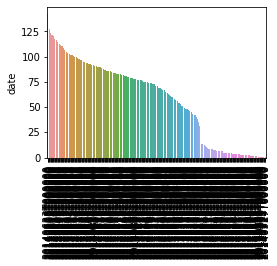

In [37]:
plt.figure(figsize=(18, 36))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)
index = 1

for col in object_cols:
	y = data[col].value_counts()
	plt.subplot(11, 4, index)
	plt.xticks(rotation=90)
	sns.barplot(x=list(y.index), y=y)
	index += 1


Top 5 features (5 tính năng hàng đầu:):


1.   bedrooms
2.   bathrooms
3.   bathrooms
4.   sqft_living
5.   sqft_above
6.   grade






#Exploratory Analysis

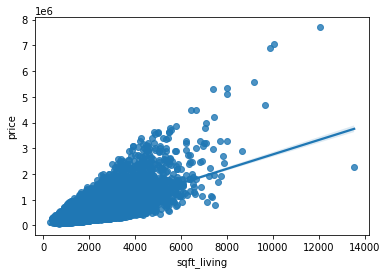

In [44]:
#sns.set_style()
sns.regplot(x='sqft_living',y='price',data=data)

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

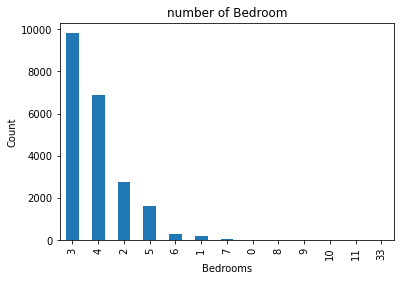

In [45]:
data['bedrooms'].value_counts().plot(kind='bar')
plt.title('number of Bedroom')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
sns.despine

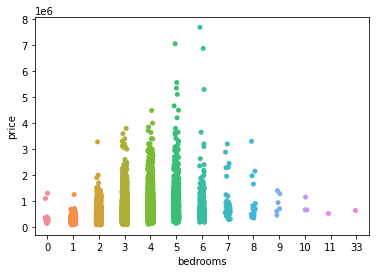

In [48]:
sns.stripplot(x='bedrooms', y='price',data=data)

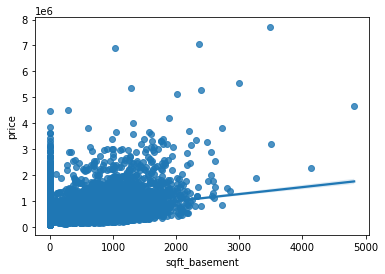

In [46]:
sns.regplot(x='sqft_basement',y='price',data=data)

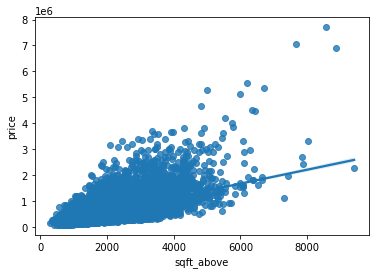

In [47]:
sns.regplot(x='sqft_above',y='price',data=data)

Biểu đồ chỉ ra rằng mối quan hệ của giá cả với phòng ngủ. Giá tăng với số lượng phòng ngủ lên đến 6 và sau đó giảm xuống khi không có phòng ngủ nào tăng lên.

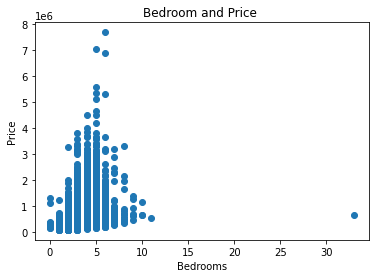

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [49]:
plt.scatter(data.bedrooms,data.price)
plt.title("Bedroom and Price ")
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.show()
sns.despine

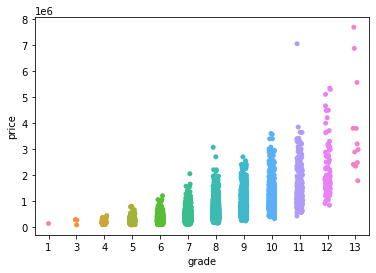

In [50]:
sns.stripplot(x='grade', y='price',data=data, size=5)

Giá nhà phụ thuộc vào hạng nhà, hạng càng cao giá càng cao.

Chúng tôi có thể loại bỏ các giá trị ngoại lai khỏi dữ liệu như nhà có phòng ngủ (bedrooms) > ​​9 và phòng tắm (bathrooms) > 7.

In [51]:
data=data[data['bedrooms'] < 10]

In [52]:
data=data[data['bathrooms']<8]

In [53]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


#Data Cleaning

In [54]:
train1 = data.drop(['id', 'price'],axis=1)

In [55]:
train1.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


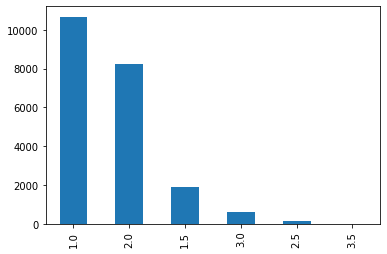

In [56]:
data.floors.value_counts().plot(kind='bar')

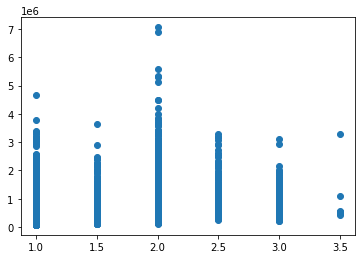

In [57]:
plt.scatter(data.floors,data.price)

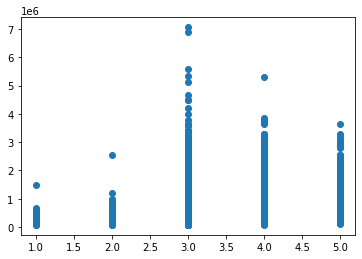

In [58]:
plt.scatter(data.condition,data.price)

Text(0.5, 1.0, 'Which is the pricey location by zipcode?')

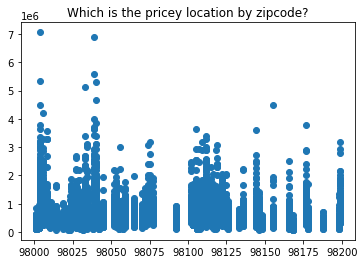

In [59]:
plt.scatter(data.zipcode,data.price)
plt.title("Which is the pricey location by zipcode?")

#Model and Accuracy

Vì chúng tôi phải đào tạo mô hình để xác định các giá trị liên tục, vì vậy chúng tôi sẽ sử dụng các mô hình hồi quy này. <br><br>


*   SVM-Support Vector Machine
*   Random Forest Regressor
*   Linear Regressor
<br><br>
Và để tính toán tổn thất, chúng tôi sẽ sử dụng mô-đun [mean_absolute_percentage_error](https://www.geeksforgeeks.org/how-to-calculate-mape-in-python/) . Nó có thể dễ dàng được nhập bằng cách sử dụng thư viện sklearn. Công thức cho lỗi tuyệt đối trung bình: 



In [73]:
labels = data['price']
conv_dates = [1 if values == 2014 else 0 for values in data.date ]
data['date'] = conv_dates
train1 = data.drop(['id', 'price'],axis=1)

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
x_train , x_test , y_train , y_test = train_test_split(train1 , labels , test_size = 0.8,random_state =42)

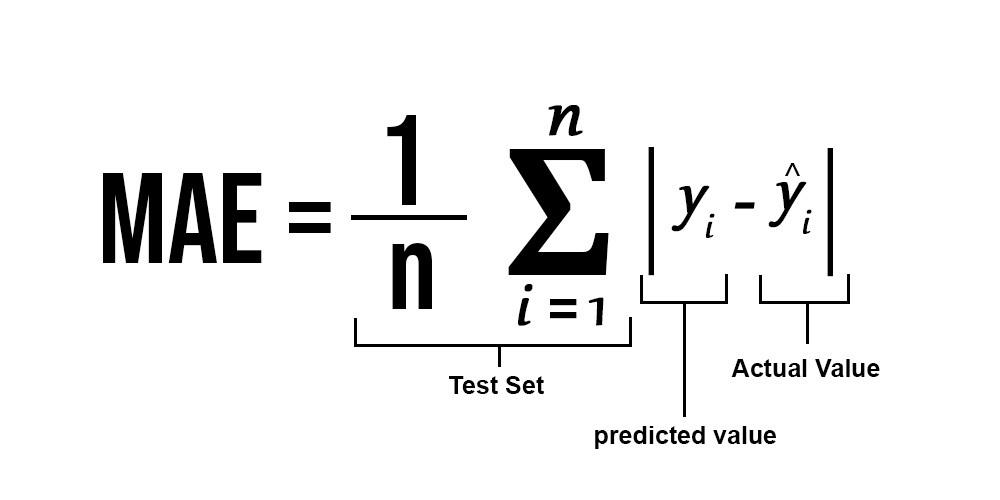

#SVM – Support vector Machine <br><br>
SVM có thể được sử dụng cho cả mô hình hồi quy và phân loại. Nó tìm siêu phẳng trong mặt phẳng n chiều.

In [76]:

from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error
 
model_SVR = svm.SVR()
model_SVR.fit(x_train,y_train)
Y_pred = model_SVR.predict(x_test)
 
print(mean_absolute_percentage_error(y_test, Y_pred))

0.42491903328364683


#Random Forest Regression
Rừng ngẫu nhiên là một kỹ thuật tập hợp sử dụng nhiều cây quyết định và có thể được sử dụng cho cả nhiệm vụ hồi quy và phân loại.

In [77]:

from sklearn.ensemble import RandomForestRegressor
 
model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(x_train, y_train)
Y_pred = model_RFR.predict(x_test)
 
mean_absolute_percentage_error(y_test, Y_pred)

0.15319994656090774

#Linear Regression

Hồi quy tuyến tính dự đoán giá trị phụ thuộc vào đầu ra cuối cùng dựa trên các tính năng độc lập đã cho. Giống như, ở đây chúng tôi phải dự đoán Giá bán tùy thuộc vào các tính năng như MSSubClass, YearBuilt, BldgType, Exterior1st, v.v. 

In [78]:
from sklearn.linear_model import LinearRegression
 
model_LR = LinearRegression()
model_LR.fit(x_train,y_train)
Y_pred = model_LR.predict(x_test)
 
print(mean_absolute_percentage_error(y_test, Y_pred))

0.2500888086172102


Tài liệu tham khảo : 


*   [geeksforgeeks](https://www.geeksforgeeks.org/house-price-prediction-using-machine-learning-in-python/)
*   [kaggle](https://www.kaggle.com/code/sociopath00/house-price-prediction-python/notebook)
*   [towardsdatascience](https://towardsdatascience.com/create-a-model-to-predict-house-prices-using-python-d34fe8fad88f)

